In [1]:
%load_ext autoreload
%autoreload 2

# Import packages 

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset and Explore it

In [208]:
sms_dataset = pd.read_csv("data/datasets_483_982_spam.csv", encoding = "ISO-8859-1")
sms_dataset_orig = sms_dataset

In [209]:
sms_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [210]:
sms_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Rename columns 

In [211]:
sms_dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [212]:
sms_dataset.columns = ["label", "message", "v2", "v3", "v4"]

In [213]:
sms_dataset.head()

,label,message,v2,v3,v4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Check abnormal columns

In [214]:
sms_dataset.v4.unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [215]:
sms_dataset.v3.unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

### Look at the repartition between ham and spam 

In [197]:
sms_dataset.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

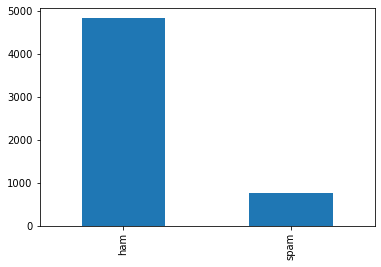

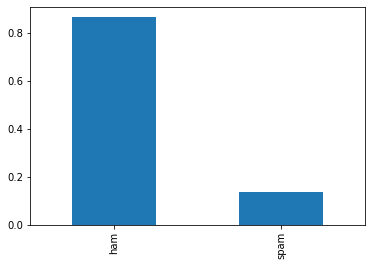

In [221]:
_, ax= plt.subplots()
sms_dataset.label.value_counts().plot(kind="bar")
_, ax= plt.subplots()
sms_dataset.label.value_counts(normalize=True).plot(kind="bar")

<class 'matplotlib.axes._subplots.AxesSubplot'>


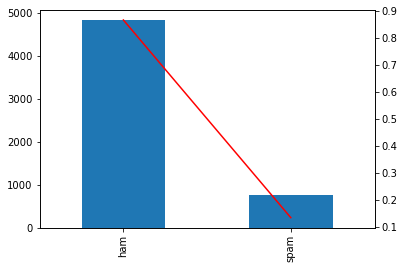

In [229]:
ax1 = sms_dataset.label.value_counts().plot.bar()
print(type(ax1))
ax2 = ax1.twinx()
sms_dataset.label.value_counts(normalize=True).plot.line(color = "red")


# Transform and Pre-process dataset 

We will remove columns that we can't use and transform initial values in something that can be easiliy used by the algorithm.

In [230]:
sms_dataset = sms_dataset.iloc[:,:2]

In [231]:
sms_dataset['label'].head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

### Create boolean label column 

In [232]:
sms_dataset.loc[:,'true_label'] = sms_dataset.label.apply(lambda x: x == "spam")
sms_dataset.head()

e:\ProgramData\Anaconda3\envs\ds_37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
e:\ProgramData\Anaconda3\envs\ds_37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,label,message,true_label
0,ham,"Go until jurong point, crazy.. Available only ...",False
1,ham,Ok lar... Joking wif u oni...,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,ham,U dun say so early hor... U c already then say...,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False


# Split Data in training set and test set 

A good practice is to split the data set in 2 datasets. 

The first dataset will be used for learning and adjusting the parameters.

The second dataset will be kept aside for final evaluation once the algorithm is tuned.

In [248]:
sms_train = sms_dataset.sample(frac=0.7, random_state = 1234)
sms_test = sms_dataset.drop(sms_train.index)

In [249]:
sms_train.head()

,label,message,true_label
1537,ham,All sounds good. Fingers . Makes it difficult ...,False
963,ham,Yo chad which gymnastics class do you wanna ta...,False
4421,ham,MMM ... Fuck .... Merry Christmas to me,False
46,ham,Didn't you get hep b immunisation in nigeria.,False
581,ham,Ok anyway no need to change with what you said,False


In [250]:
sms_train.shape, sms_test.shape

((3900, 3), (1672, 3))

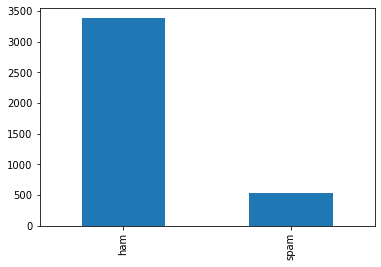

In [251]:
sms_train.label.value_counts().plot.bar()

# Traditional approach : predict 

In [188]:
def trad_predict_label(message):
    if "€" in message:
        return True
    if "$" in message:
        return True
    if "£" in message:
        return True
    return False

In [189]:
trad_predict_label("test of sms"), trad_predict_label("test of € sms")

(False, True)

In [190]:
trad_predict_label(sms_dataset.message[0])

False

In [191]:
sms_dataset.message.apply(trad_predict_label).sum()

275

In [192]:
sms_dataset['trad_label'] = sms_dataset.message.apply(trad_predict_label)

e:\ProgramData\Anaconda3\envs\ds_37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
sms_dataset.head()

,label,message,label_b,trad_label
0,ham,"Go until jurong point, crazy.. Available only ...",False,False
1,ham,Ok lar... Joking wif u oni...,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,True,False
3,ham,U dun say so early hor... U c already then say...,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False


### Define score 

In [257]:
sms_dataset.label.count()

5572